In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
df_analyse=pd.read_csv('../data/processed/datetime.csv',sep=';',index_col=0)  
df_analyse.sort_values('date',ascending=True).head()

,date,China,India,US,Italy,Germany
0,2020-01-22,17,0,0,0,0
1,2020-01-23,18,0,0,0,0
2,2020-01-24,26,0,0,0,0
3,2020-01-25,42,0,0,0,0
4,2020-01-26,56,0,0,0,0


In [3]:
N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[55]
S0=N0-I0
R0=0

In [4]:
df_analyse.Germany[55]

24

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


**SIMULATIVE APPROACH TO CALCULATE SIR CURVE**

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


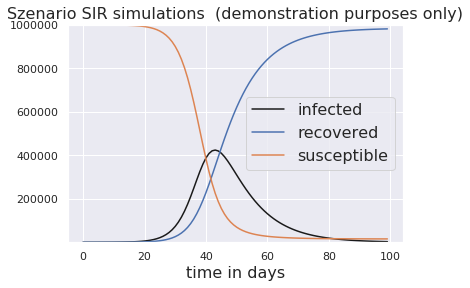

In [7]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Fitting the parameters of SIR model**

In [8]:
ydata = np.array(df_analyse.Germany[55:])
t=np.arange(len(ydata))

In [9]:
#re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [10]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [11]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [12]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([2.40000000e+01, 3.23962316e+01, 4.37295974e+01, 5.90273658e+01,
       7.96759393e+01, 1.07546283e+02, 1.45163052e+02, 1.95932561e+02,
       2.64449912e+02, 3.56912478e+02, 4.81676058e+02, 6.50001995e+02,
       8.77059089e+02, 1.18326410e+03, 1.59606959e+03, 2.15233795e+03,
       2.90147526e+03, 3.90953383e+03, 5.26452113e+03, 7.08315792e+03,
       9.51927809e+03, 1.27739016e+04, 1.71066459e+04, 2.28474281e+04,
       3.04061622e+04, 4.02761760e+04, 5.30243139e+04, 6.92575685e+04,
       8.95540374e+04, 1.14348088e+05, 1.43770295e+05, 1.77465480e+05,
       2.14443556e+05, 2.53041327e+05, 2.91062043e+05, 3.26097663e+05,
       3.55949184e+05, 3.79002096e+05, 3.94433450e+05, 4.02210824e+05,
       4.02931248e+05, 3.97589499e+05, 3.87355174e+05, 3.73402698e+05,
       3.56804853e+05, 3.38480454e+05, 3.19179914e+05, 2.99493344e+05,
       2.79869765e+05, 2.60640065e+05, 2.42039567e+05, 2.24228236e+05,
       2.07307771e+05, 1.91335593e+05, 1.76336018e+05, 1.62309031e+05,
      

In [13]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00925878 0.00905949]  start infect: 24
Optimal parameters: beta = 0.39403217864322676  and gamma =  0.3340914912801826


In [14]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

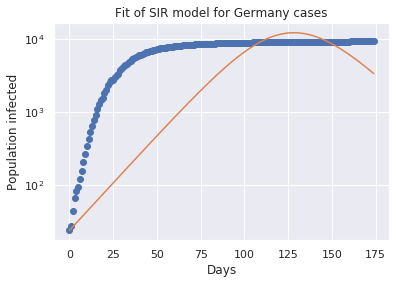

Optimal parameters: beta = 0.39403217864322676  and gamma =  0.3340914912801826
Basic Reproduction Number R0  1.1794139896630156
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [15]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")